# k-NN

Here's some code to generate a mixture of gaussians. Each point is associated with one 2D gaussian distribution with fixed center and dispersion matrix. The label of the point corresponds to the center of its distribution. A plot is made showing the 3 categories

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as sms

# Set the parameters for each Gaussian
means = [
    [2, 2],   # Mean of the first Gaussian
    [-1, -1], # Mean of the second Gaussian
    [3, -3]   # Mean of the third Gaussian
]
covariances = [
    [[1, 0.5], [0.5, 1]],  # Covariance of the first Gaussian
    [[1, 7.9], [7.9, 1]], # Covariance of the second Gaussian
    [[1, 0.2], [0.2, 1]]   # Covariance of the third Gaussian
]
n_samples = 300  # Samples per Gaussian

# Generate data
data = []
labels = []
for i, (mean, cov) in enumerate(zip(means, covariances)):
    points = np.random.multivariate_normal(mean, cov, n_samples)
    data.append(points)
    labels += [i] * n_samples  # Label each Gaussian with a different number

# Combine all the data
data = np.vstack(data)
labels = np.array(labels)


/var/folders/_z/fcth_nbd7hg70v8d_k1tt9sr0000gn/T/ipykernel_42920/1367230216.py:22: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  points = np.random.multivariate_normal(mean, cov, n_samples)


# Make a Train Test Split

In [23]:
X_train, X_test, y_train, y_test= sms.train_test_split(data, labels, test_size=0.2)

## Plot the train data

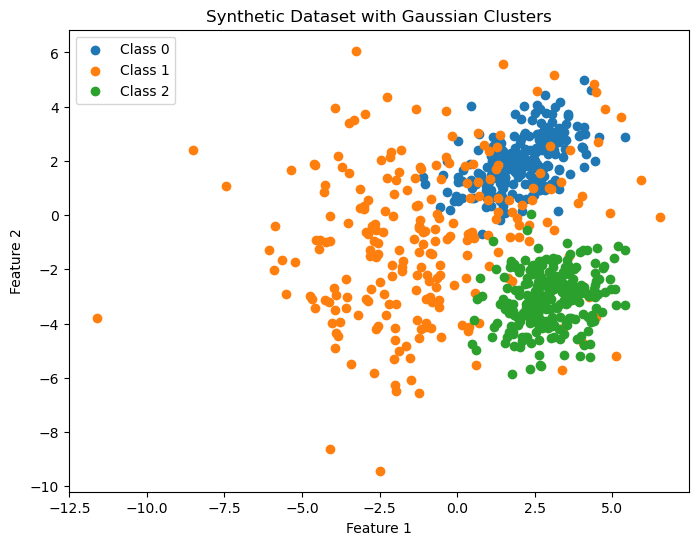

In [24]:

# Visualize the data
plt.figure(figsize=(8, 6))
for i in range(len(means)):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], label=f'Class {i}')
#for i in range(len(means)):
#    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], label=f'Class ?')

plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset with Gaussian Clusters')
plt.show()

Write a knn_label method. Input

* X_train
* y_train
* X
* y

It finds and returns the label yhat by finding the 1 nearest neighbor to X in X_train and assigning the label of X_train[best] to yhat.

In [25]:
def knn_label(X_train, y_train, X, y):
    distances = [(np.linalg.norm(x-X),i) for (i,x) in enumerate(X_train)]
    closest =  min(distances)[1]
    return y_train[closest], y

In [26]:
from scipy.stats import mode
def knn_label_k(X_train, y_train, X, y, k):
    distances = [[np.linalg.norm(x-X),i] for (i,x) in enumerate(X_train)]
    distances.sort()
    closest_k =  [i for _,i in distances[:k]]
    return mode(y_train[closest_k])[0], y

Print out rows for each test data point in the format

T/F, X1, X2, y, yhat

where T/F is true if y==yhat

In [27]:
errors = []
for k in range(1,20):
    count = 0
    for x,y in zip(X_test, y_test):
        yhat, y = knn_label_k(X_train, y_train,x,y,k)
        # print (yhat==y, x, yhat, y)
        if (yhat > y or yhat < y):
            count += 1
    print (k, " Errors = ", count / len(y_test))
    errors += [count]

1  Errors =  0.15555555555555556
2  Errors =  0.15555555555555556
3  Errors =  0.15555555555555556
4  Errors =  0.16111111111111112
5  Errors =  0.14444444444444443
6  Errors =  0.14444444444444443
7  Errors =  0.14444444444444443
8  Errors =  0.12777777777777777
9  Errors =  0.12777777777777777
10  Errors =  0.12777777777777777
11  Errors =  0.12222222222222222
12  Errors =  0.12222222222222222
13  Errors =  0.13333333333333333
14  Errors =  0.12777777777777777
15  Errors =  0.12777777777777777
16  Errors =  0.12777777777777777
17  Errors =  0.12777777777777777
18  Errors =  0.13333333333333333
19  Errors =  0.12777777777777777


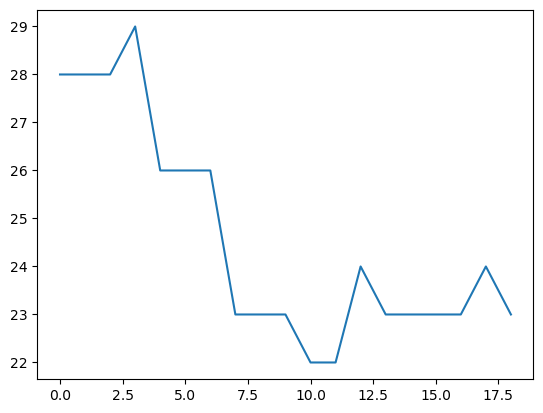

In [28]:
plt.plot(errors)

Come up with a nice way to visualize the location of the test points. Mislabeled points should be clearly visible by some graphic attribute.

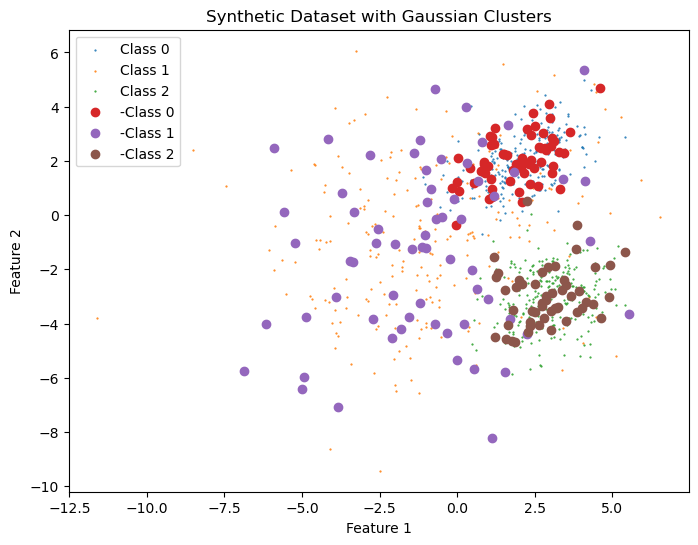

In [34]:
# Visualize the data
plt.figure(figsize=(8, 6))
for i in range(len(means)):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], label=f'Class {i}', s=0.3)
#for i in range(len(means)):
#    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], label=f'Class ?')
yhat = []
for x,y in zip(X_test, y_test):
    yh, y = knn_label(X_train, y_train,x,y)
    yhat += [yh]
yhat = np.array(yhat)
for i in range(len(means)):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], label=f'-Class {i}')
    
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset with Gaussian Clusters')
plt.show()

In [41]:
yhat == y_test 

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,

## Extension

Expand this technique. You could 

* compute k-nn with k>1 and analyze the error rate as a function of k
* create d-dimensional datasets and analyze the error rate as a function of d (in this case your number of point should also scale appropriately to acheive a similar density)
* Vary the centers or dispersions of the distributions and analyze the error
* Vary the number of distributions AND also k. Is there a relation?